In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jupyter_black

jupyter_black.load()

In [3]:
import numpy as np

from acoustics.plot import plot

# Room shape and dimensions

<img src="../images/media-room-model.png" width=500/>

In [4]:
# In meters:
ceil_height = 2.52095
front_width = 3.6957
back_width = 3.95605
left_front_length = 2.5781
left_back_length = 2.7559

In [5]:
volume = (
    # front half of the room
    (front_width * left_front_length * ceil_height)
    + (back_width * left_back_length * ceil_height)
)
print(f"The room volume is {volume:0.2f}m³")

The room volume is 51.50m³


In [6]:
area = (
    # front
    front_width * ceil_height
    +
    # back
    back_width * ceil_height
    +
    # left front
    left_front_length * ceil_height
    +
    # left back
    left_back_length * ceil_height
    +
    # right
    (left_front_length + left_back_length) * ceil_height
    +
    # ceiling
    left_front_length * front_width
    + left_back_length * back_width
)
print(f"The room surface area, excluding the floor, is {area:0.2f}m²")

The room surface area, excluding the floor, is 66.61m²


# General Target

The targets used here are roughly based on the disussion in https://youtu.be/G0ekssXX7rE?t=1814.

According to that presentation the general decay time should generally be between .2 and .4 seconds for most listening rooms.

According to research the broadly preferred conforms to:
Tm = 0.3*(V/100)^(1/3) ±15%

This is similar to, but not exactly what's specified in https://www.aes.org/technical/documents/AESTD1001.pdf. One interesting addition that it makes is that the variation between adjacent octave bands should be ±5%.

Another video that covers the topic is https://www.youtube.com/watch?v=Wf22792Fo3c

In [7]:
Tm = 0.3 * np.power(volume / 100, 1.0 / 3.0)
print(
    f"The target decay time for {volume:0.2f}m³ is {Tm:0.3f}s with a lower bound of {Tm*0.85:0.2f}s and upper of {Tm*1.15:0.2f}s"
)

The target decay time for 51.50m³ is 0.240s with a lower bound of 0.20s and upper of 0.28s


## Target vs Frequency

Based on https://youtu.be/G0ekssXX7rE?t=2223 the ultimate target is flat at Tm. It does present a bit more leeway based on frequency. There's an upwards trend starting below 200Hz and hitting 2Tm at 63Hz. There's a step down to 0.5Tm at 4000Hz and above.

Large variations in decay time across the spectrum are considered bad, so consistency is > specifically adhering to the values here. There's also personal preference at play. So these are guidlines.

  63Hz 0.20s - 0.48s
 200Hz 0.20s - 0.28s
3999Hz 0.20s - 0.28s
4000Hz 0.12s - 0.28s
8000Hz 0.12s - 0.28s


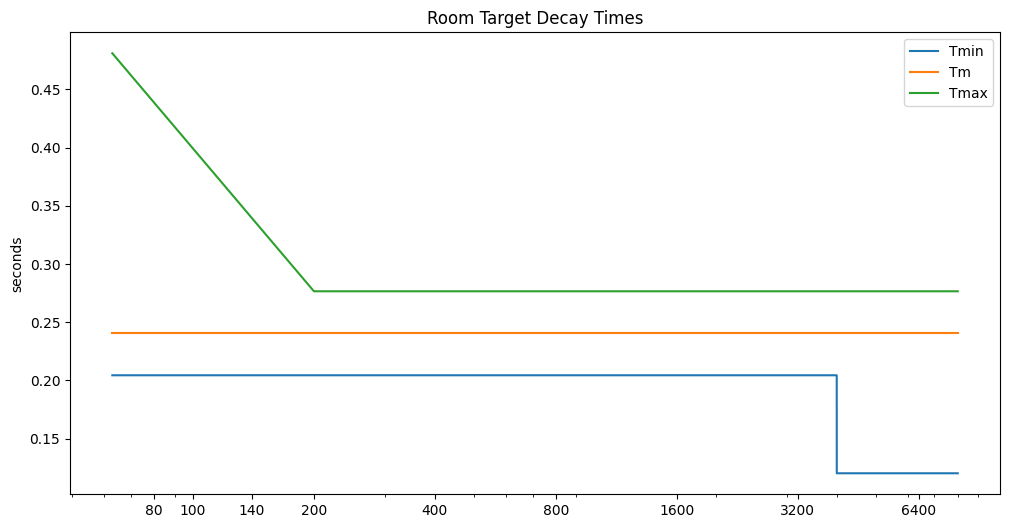

In [8]:
T_x = (63, 200, 3999, 4000, 8000)
Tmin = (0.85 * Tm, 0.85 * Tm, 0.85 * Tm, 0.5 * Tm, 0.5 * Tm)
Tmax = (2 * Tm, 1.15 * Tm, 1.15 * Tm, 1.15 * Tm, 1.15 * Tm)

ax = plot(
    T_x,
    {
        "Tmin": Tmin,
        "Tm": [Tm for _ in T_x],
        "Tmax": Tmax,
    },
    title="Room Target Decay Times",
)
ax.set_ylabel("seconds")

for i, x in enumerate(T_x):
    print(f"{x:4d}Hz {Tmin[i]:.2f}s - {Tmax[i]:.2f}s")

## Required Sabines

TODO: doc & references

In [9]:
# RT60 = 0.161*volume / Sa
# Sa = 0.161*volume / RT60
Sarequired = (0.161 * volume) / Tm
print(
    f"An estimated {Sarequired:.2f} sabines required for a room with {volume:0.2f}m³ to reach {Tm:0.3f}s"
)

An estimated 34.48 sabines required for a room with 51.50m³ to reach 0.240s


In [10]:
# store target & geomtric data so we can use it elsewhere
%store area
%store volume
%store Tm
%store T_x
%store Tmin
%store Tmax
%store Sarequired

Stored 'area' (float)
Stored 'volume' (float)
Stored 'Tm' (float64)
Stored 'T_x' (tuple)
Stored 'Tmin' (tuple)
Stored 'Tmax' (tuple)
Stored 'Sarequired' (float64)
